In [6]:
# 导入必要的库
import pandas as pd
import numpy as np
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import classification_report, confusion_matrix, roc_curve, auc
import matplotlib.pyplot as plt
import seaborn as sns

# 设置随机种子以确保结果可重复
np.random.seed(42)

# 加载数据
train_data = pd.read_csv('Census Income Data Set/train_data.csv')
test_data = pd.read_csv('Census Income Data Set/test_data.csv')

# 准备特征和目标变量
X_train = train_data.drop('income', axis=1)
y_train = train_data['income']
X_test = test_data.drop('income', axis=1)
y_test = test_data['income']

print("数据集信息：")
print(f"训练集大小: {X_train.shape}")
print(f"测试集大小: {X_test.shape}")
print(f"特征数量: {X_train.shape[1]}")

数据集信息：
训练集大小: (21113, 93)
测试集大小: (9049, 93)
特征数量: 93


In [7]:
# 定义超参数网格
param_grid = {
    'n_estimators': [100, 200, 300],      # 树的数量
    'max_depth': [10, 20, None],          # 树的最大深度
    'min_samples_split': [2, 5, 10],      # 分裂所需的最小样本数
    'min_samples_leaf': [1, 2, 4],        # 叶节点的最小样本数
    'bootstrap': [True]                    # 使用bootstrap采样
}

# 解释超参数选择：
# n_estimators: 100-300棵树通常能提供好的性能同时保持合理的计算时间
# max_depth: 限制树的深度可以防止过拟合，None表示允许树完全生长
# min_samples_split: 较大的值可以防止过拟合
# min_samples_leaf: 确保每个叶节点有足够的样本以提高可靠性
# bootstrap: True表示使用自助采样，对于每棵树：
#   - 随机有放回地抽取与原始数据集相同大小的样本
#   - 大约63.2%的原始样本会被选中
#   - 剩余约36.8%的样本可以用作"袋外"(out-of-bag)估计

# 初始化随机森林和网格搜索
grid_search = GridSearchCV(
    RandomForestClassifier(random_state=42),
    param_grid,
    cv=5,                 # 5折交叉验证
    scoring='accuracy',   # 使用准确率作为评估指标
    n_jobs=-1,           # 使用所有可用的CPU核心
    verbose=1            # 显示进度
)

# 执行网格搜索
import time
print("开始网格搜索以找到最佳参数...")
start_time = time.time()
grid_search.fit(X_train, y_train)
end_time = time.time()

# 计算并输出网格搜索时间
grid_search_time = end_time - start_time
print(f"\n网格搜索完成！")
print(f"网格搜索训练时间: {grid_search_time:.2f} 秒 ({grid_search_time/60:.2f} 分钟)")

# 输出最佳参数和得分
print("\n最佳参数：")
print(grid_search.best_params_)
print(f"\n最佳交叉验证得分：{grid_search.best_score_:.4f}")

# 查看不同参数组合的结果
results = pd.DataFrame(grid_search.cv_results_)
print("\n前5个参数组合的结果：")
print(results[['params', 'mean_test_score', 'std_test_score']].head())

开始网格搜索以找到最佳参数...
Fitting 5 folds for each of 81 candidates, totalling 405 fits

网格搜索完成！
网格搜索训练时间: 72.28 秒 (1.20 分钟)

最佳参数：
{'bootstrap': True, 'max_depth': None, 'min_samples_leaf': 2, 'min_samples_split': 10, 'n_estimators': 300}

最佳交叉验证得分：0.8356

前5个参数组合的结果：
                                              params  mean_test_score  \
0  {'bootstrap': True, 'max_depth': 10, 'min_samp...         0.826032   
1  {'bootstrap': True, 'max_depth': 10, 'min_samp...         0.826126   
2  {'bootstrap': True, 'max_depth': 10, 'min_samp...         0.826600   
3  {'bootstrap': True, 'max_depth': 10, 'min_samp...         0.825368   
4  {'bootstrap': True, 'max_depth': 10, 'min_samp...         0.825084   

   std_test_score  
0        0.004203  
1        0.003767  
2        0.003920  
3        0.003833  
4        0.002697  

网格搜索完成！
网格搜索训练时间: 72.28 秒 (1.20 分钟)

最佳参数：
{'bootstrap': True, 'max_depth': None, 'min_samples_leaf': 2, 'min_samples_split': 10, 'n_estimators': 300}

最佳交叉验证得分：0.8356

前5个参数组合的结果

开始训练最终随机森林模型...
最终模型训练完成！
最终模型训练时间: 2.5944 秒
最终模型训练完成！
最终模型训练时间: 2.5944 秒

模型评估结果：

混淆矩阵：
[[6286  511]
 [ 973 1279]]

分类报告：
              precision    recall  f1-score   support

           0       0.87      0.92      0.89      6797
           1       0.71      0.57      0.63      2252

    accuracy                           0.84      9049
   macro avg       0.79      0.75      0.76      9049
weighted avg       0.83      0.84      0.83      9049


模型评估结果：

混淆矩阵：
[[6286  511]
 [ 973 1279]]

分类报告：
              precision    recall  f1-score   support

           0       0.87      0.92      0.89      6797
           1       0.71      0.57      0.63      2252

    accuracy                           0.84      9049
   macro avg       0.79      0.75      0.76      9049
weighted avg       0.83      0.84      0.83      9049



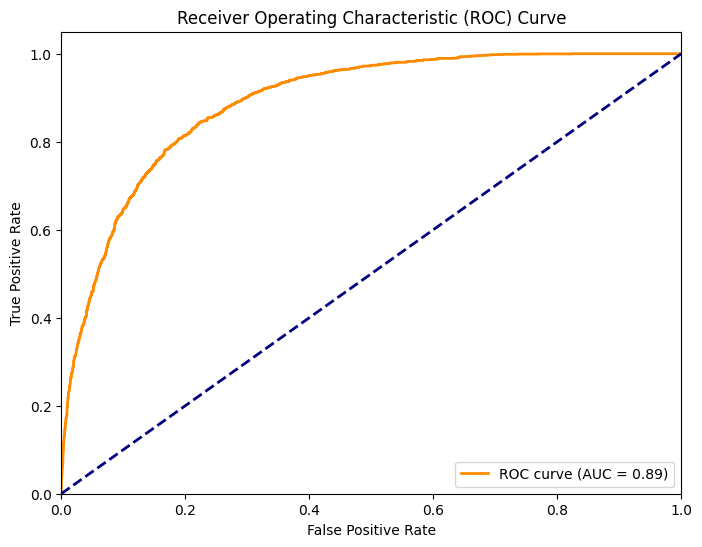

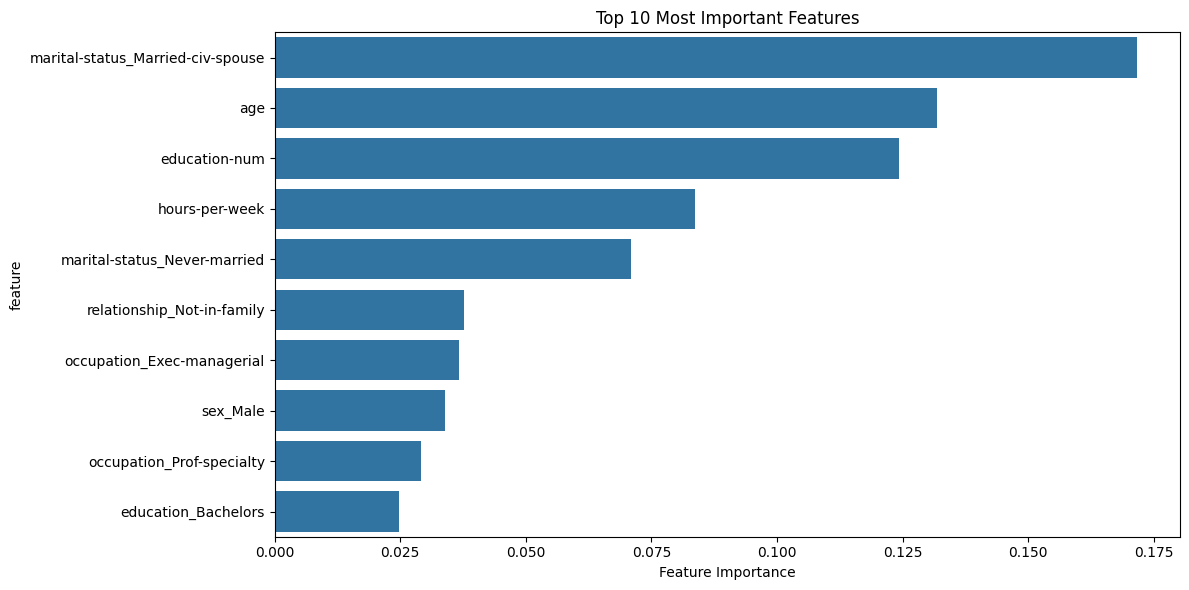


前10个最重要的特征：
                              feature  importance
25  marital-status_Married-civ-spouse    0.171616
0                                 age    0.131844
1                       education-num    0.124181
2                      hours-per-week    0.083672
27       marital-status_Never-married    0.070864
43         relationship_Not-in-family    0.037650
32         occupation_Exec-managerial    0.036657
52                           sex_Male    0.033899
38          occupation_Prof-specialty    0.029158
17                education_Bachelors    0.024685


In [8]:
# 使用最佳参数训练最终模型
print("开始训练最终随机森林模型...")
final_start_time = time.time()
best_rf = RandomForestClassifier(**grid_search.best_params_, random_state=42)
best_rf.fit(X_train, y_train)
final_end_time = time.time()

# 计算并输出最终模型训练时间
final_training_time = final_end_time - final_start_time
print(f"最终模型训练完成！")
print(f"最终模型训练时间: {final_training_time:.4f} 秒")

# 在测试集上进行预测
y_pred = best_rf.predict(X_test)
y_pred_proba = best_rf.predict_proba(X_test)[:, 1]

# 打印评估指标
print("\n模型评估结果：")
print("\n混淆矩阵：")
print(confusion_matrix(y_test, y_pred))
print("\n分类报告：")
print(classification_report(y_test, y_pred))

# 绘制ROC曲线
fpr, tpr, _ = roc_curve(y_test, y_pred_proba)
roc_auc = auc(fpr, tpr)

plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='darkorange', lw=2, 
         label=f'ROC curve (AUC = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc="lower right")
plt.show()

# 分析特征重要性
feature_importance = pd.DataFrame({
    'feature': X_train.columns,
    'importance': best_rf.feature_importances_
})
feature_importance = feature_importance.sort_values('importance', ascending=False)

plt.figure(figsize=(12, 6))
sns.barplot(x='importance', y='feature', data=feature_importance.head(10))
plt.title('Top 10 Most Important Features')
plt.xlabel('Feature Importance')
plt.tight_layout()
plt.show()

print("\n前10个最重要的特征：")
print(feature_importance.head(10))

In [9]:
# 保存最佳模型
import joblib
joblib.dump(best_rf, 'RandomForest_model.pkl')
print("随机森林模型已保存到 'RandomForest_model.pkl'")

# 输出训练时间总结
print("\n=== 随机森林训练时间总结 ===")
total_training_time = grid_search_time + final_training_time
print(f"网格搜索时间: {grid_search_time:.2f} 秒 ({grid_search_time/60:.2f} 分钟)")
print(f"最终模型训练时间: {final_training_time:.4f} 秒")
print(f"总训练时间: {total_training_time:.2f} 秒 ({total_training_time/60:.2f} 分钟)")

# 计算每个参数组合的平均训练时间
n_param_combinations = len(param_grid['n_estimators']) * len(param_grid['max_depth']) * len(param_grid['min_samples_split']) * len(param_grid['min_samples_leaf'])
avg_time_per_combination = grid_search_time / (n_param_combinations * 5)  # 5折交叉验证
print(f"\n每个参数组合的平均训练时间: {avg_time_per_combination:.4f} 秒")
print(f"总参数组合数: {n_param_combinations}")
print(f"交叉验证折数: 5")
print(f"总训练次数: {n_param_combinations * 5}")

# 显示最佳参数配置下的模型信息
print(f"\n最佳模型配置:")
print(f"- 树的数量: {best_rf.n_estimators}")
print(f"- 最大深度: {best_rf.max_depth}")
print(f"- 分裂最小样本数: {best_rf.min_samples_split}")
print(f"- 叶节点最小样本数: {best_rf.min_samples_leaf}")
print(f"- 单棵树平均训练时间: {final_training_time/best_rf.n_estimators:.6f} 秒")

随机森林模型已保存到 'RandomForest_model.pkl'

=== 随机森林训练时间总结 ===
网格搜索时间: 72.28 秒 (1.20 分钟)
最终模型训练时间: 2.5944 秒
总训练时间: 74.88 秒 (1.25 分钟)

每个参数组合的平均训练时间: 0.1785 秒
总参数组合数: 81
交叉验证折数: 5
总训练次数: 405

最佳模型配置:
- 树的数量: 300
- 最大深度: None
- 分裂最小样本数: 10
- 叶节点最小样本数: 2
- 单棵树平均训练时间: 0.008648 秒


In [10]:
# 加载保存的模型并进行验证
print("开始验证保存的模型...")

# 1. 加载保存的模型
saved_rf = joblib.load('RandomForest_model.pkl')

# 2. 验证模型参数
print("\n1. 验证模型参数：")
best_params = best_rf.get_params()
saved_params = saved_rf.get_params()

# 检查关键参数
key_params = ['n_estimators', 'max_depth', 'min_samples_split', 'min_samples_leaf']
print("\n关键参数比较：")
for param in key_params:
    print(f"{param}:")
    print(f"  - 最佳模型: {best_params[param]}")
    print(f"  - 保存模型: {saved_params[param]}")
    print(f"  - 匹配: {'✓' if best_params[param] == saved_params[param] else '✗'}")

# 3. 验证预测性能
print("\n2. 验证预测性能：")
# 使用测试集进行预测
best_pred = best_rf.predict(X_test)
saved_pred = saved_rf.predict(X_test)

# 计算并比较准确率
best_accuracy = best_rf.score(X_test, y_test)
saved_accuracy = saved_rf.score(X_test, y_test)

print(f"最佳模型准确率: {best_accuracy:.4f}")
print(f"保存模型准确率: {saved_accuracy:.4f}")
print(f"准确率差异: {abs(best_accuracy - saved_accuracy):.6f}")
print(f"预测结果完全相同: {'✓' if np.array_equal(best_pred, saved_pred) else '✗'}")

# 4. 验证特征重要性
print("\n3. 验证特征重要性：")
best_importance = pd.DataFrame({
    'feature': X_train.columns,
    'importance_best': best_rf.feature_importances_,
    'importance_saved': saved_rf.feature_importances_
}).sort_values('importance_best', ascending=False)

best_importance['difference'] = abs(best_importance['importance_best'] - 
                                 best_importance['importance_saved'])

print("特征重要性最大差异：", best_importance['difference'].max())
importance_match = np.allclose(best_rf.feature_importances_, 
                             saved_rf.feature_importances_, 
                             rtol=1e-5, atol=1e-8)
print(f"特征重要性匹配: {'✓' if importance_match else '✗'}")

# 5. 总结验证结果
print("\n验证总结：")
params_match = all(best_params[param] == saved_params[param] for param in key_params)
predictions_match = np.array_equal(best_pred, saved_pred)

if params_match and predictions_match and importance_match:
    print("✅ 验证通过！保存的模型与最佳模型完全一致。")
else:
    print("⚠️ 警告！发现以下问题：")
    if not params_match:
        print("- 模型参数不匹配")
    if not predictions_match:
        print("- 预测结果不一致")
    if not importance_match:
        print("- 特征重要性不一致")
    print("\n建议重新保存模型！")

开始验证保存的模型...

1. 验证模型参数：

关键参数比较：
n_estimators:
  - 最佳模型: 300
  - 保存模型: 300
  - 匹配: ✓
max_depth:
  - 最佳模型: None
  - 保存模型: None
  - 匹配: ✓
min_samples_split:
  - 最佳模型: 10
  - 保存模型: 10
  - 匹配: ✓
min_samples_leaf:
  - 最佳模型: 2
  - 保存模型: 2
  - 匹配: ✓

2. 验证预测性能：

1. 验证模型参数：

关键参数比较：
n_estimators:
  - 最佳模型: 300
  - 保存模型: 300
  - 匹配: ✓
max_depth:
  - 最佳模型: None
  - 保存模型: None
  - 匹配: ✓
min_samples_split:
  - 最佳模型: 10
  - 保存模型: 10
  - 匹配: ✓
min_samples_leaf:
  - 最佳模型: 2
  - 保存模型: 2
  - 匹配: ✓

2. 验证预测性能：
最佳模型准确率: 0.8360
保存模型准确率: 0.8360
准确率差异: 0.000000
预测结果完全相同: ✓

3. 验证特征重要性：
特征重要性最大差异： 0.0
特征重要性匹配: ✓

验证总结：
✅ 验证通过！保存的模型与最佳模型完全一致。
最佳模型准确率: 0.8360
保存模型准确率: 0.8360
准确率差异: 0.000000
预测结果完全相同: ✓

3. 验证特征重要性：
特征重要性最大差异： 0.0
特征重要性匹配: ✓

验证总结：
✅ 验证通过！保存的模型与最佳模型完全一致。
